In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [70]:
df = pd.read_csv("HRA_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [71]:
df.shape

(1470, 35)

from the first overlook of the data, the data contains 34 features mixed of categorical and numerical features both.

In [72]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [73]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [74]:
# numerical features
num_feat = list(df.describe().columns)
num_feat

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [75]:
df = df.drop(["StandardHours", 'EmployeeCount'], axis = 1)

In [76]:
num_feat = list(df.describe().columns)
# categorical features
columns = list(df.columns)
cat_feat = [feat for feat in columns if feat not in num_feat]

In [77]:
df[num_feat].corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


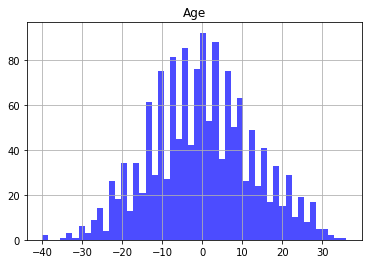

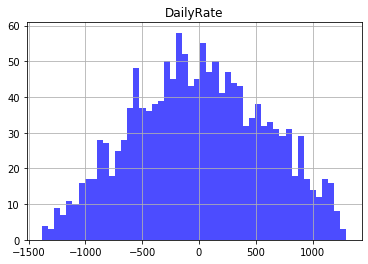

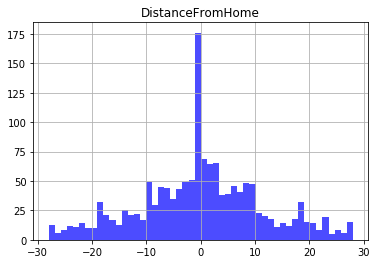

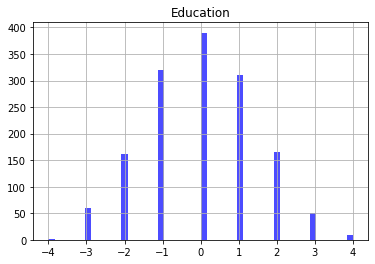

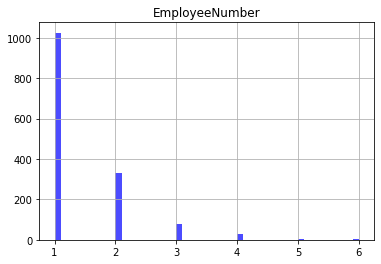

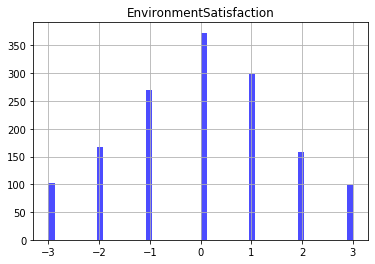

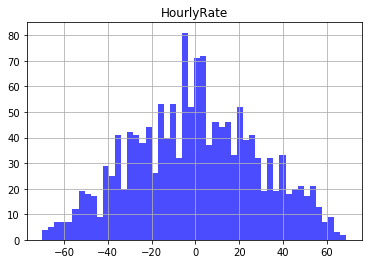

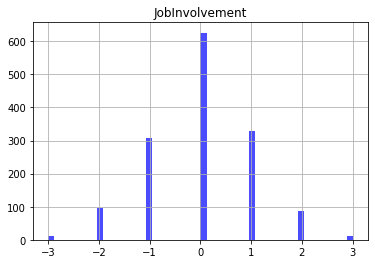

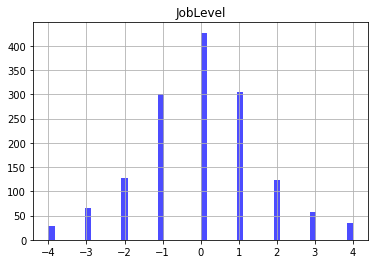

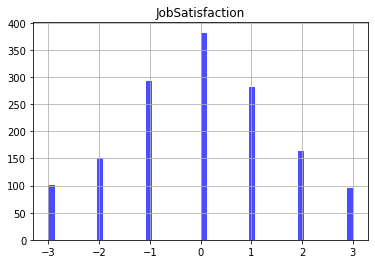

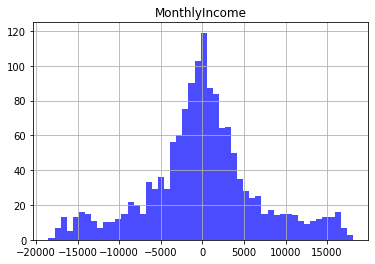

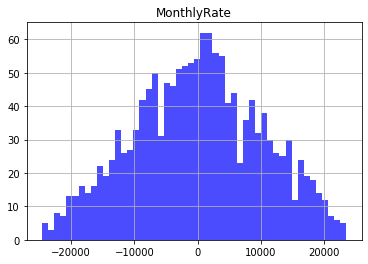

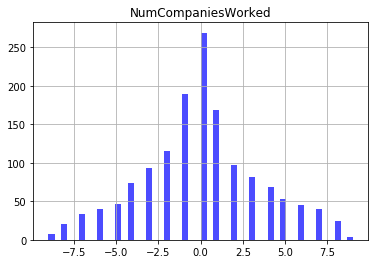

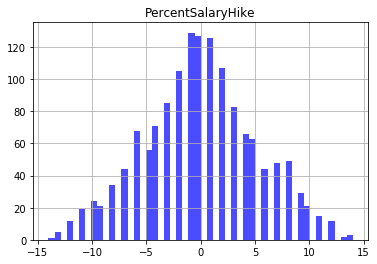

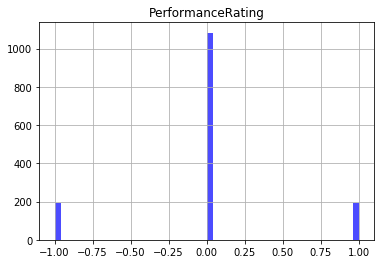

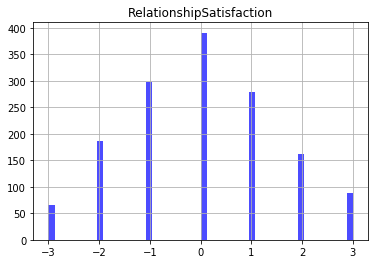

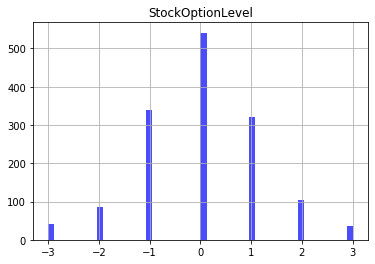

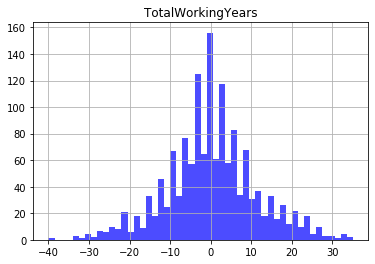

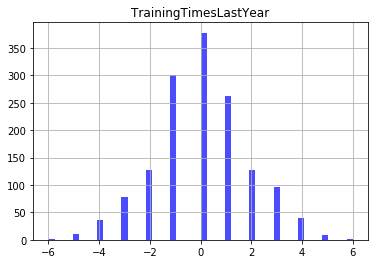

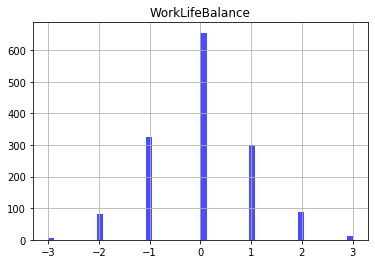

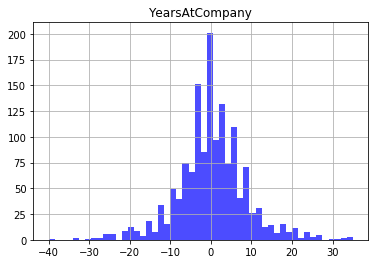

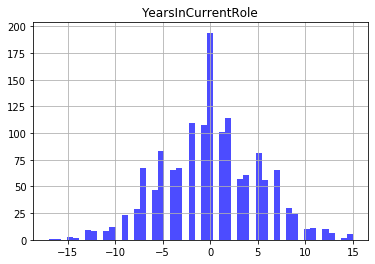

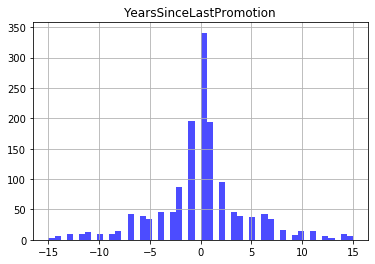

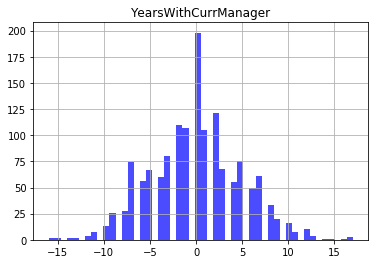

In [78]:
import matplotlib.pyplot as plt
num_df = df.drop(cat_feat, axis = 1)
#plt.figure()
for i in num_feat:
    plt.figure()
    plt.title(i)
    num_df[i].diff().hist(color='b', alpha=0.7, bins=50)

Features are normally distributed. Some of the features has numerical values but can be considered as categorical features. for example, performance rating, relationship satisfaction, job satisfaction, job level, environment satisfaction, employee number. Since these can also be considered as numerical features because its values has increasing or decreasing order.

In [79]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Age,0.413286,-0.404145
DailyRate,-0.003519,-1.203823
DistanceFromHome,0.958118,-0.224833
Education,-0.289681,-0.559115
EmployeeNumber,0.016574,-1.223179
EnvironmentSatisfaction,-0.321654,-1.202521
HourlyRate,-0.032311,-1.196398
JobInvolvement,-0.498419,0.270999
JobLevel,1.025401,0.399152
JobSatisfaction,-0.329672,-1.222193


#### removing skewness

The skewed columns are DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, StockOptionLevel, YearsAtCompany, YearsInCurrentRole and YearsWithCurrManager. This type of skewness can be removed by the taking the square root.

In [80]:
columns = list(df.columns)
skew = ["DistanceFromHome", "JobLevel", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "StockOptionLevel", 
        "YearsAtCompany", "YearsInCurrentRole","YearsWithCurrManager"]

for col in skew:
    df.insert(list(df).index(col), col + '1', np.sqrt(df.iloc[:,columns.index(col)]))
    df = df.drop([col], axis = 1)

In [81]:
df.columns = columns
df[skew].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
DistanceFromHome,0.398114,-0.977407
JobLevel,0.593923,-0.514371
MonthlyIncome,0.861960,-0.113385
NumCompaniesWorked,0.031303,-0.636176
PercentSalaryHike,0.655412,-0.602798
StockOptionLevel,0.057528,-1.484347
YearsAtCompany,0.426835,0.385665
YearsInCurrentRole,-0.254344,-0.637002
YearsWithCurrManager,-0.254611,-0.772843


The skewness of the respective columns have been reduced significantly.

### checking for outliers.

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figu

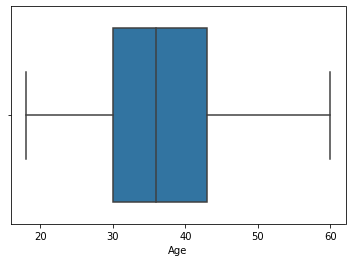

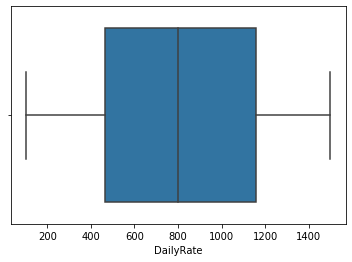

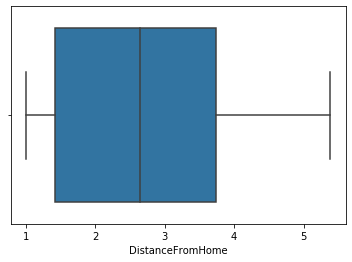

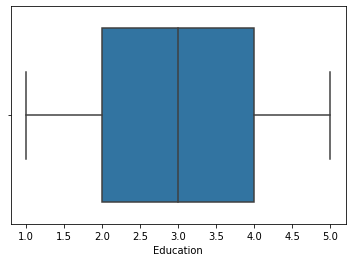

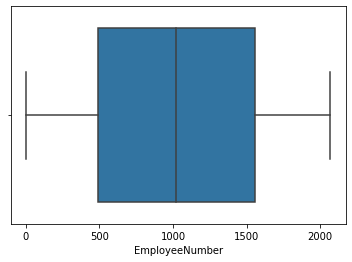

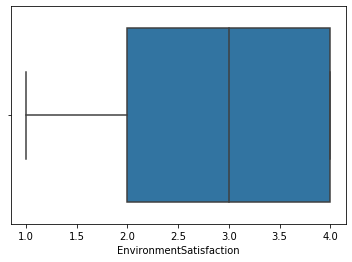

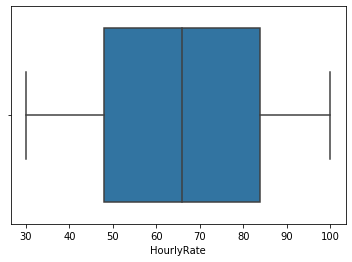

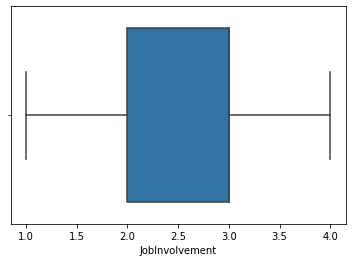

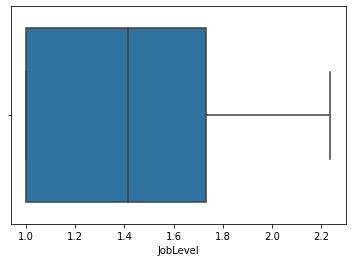

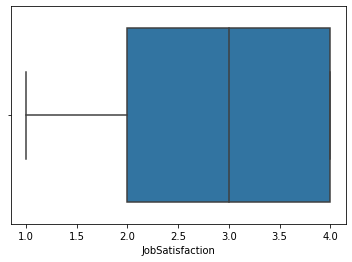

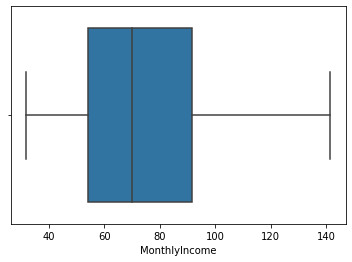

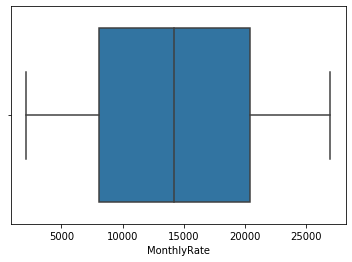

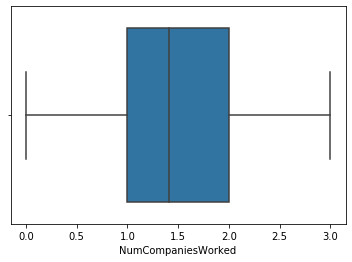

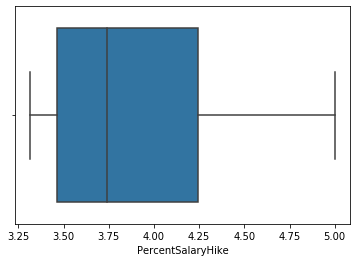

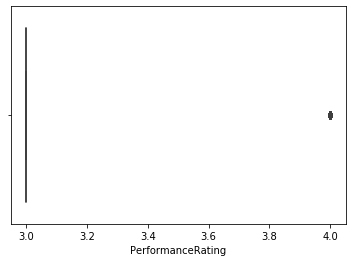

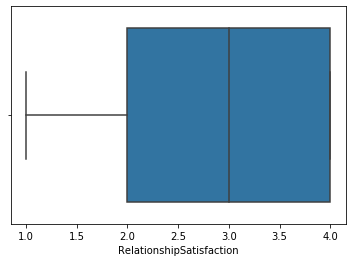

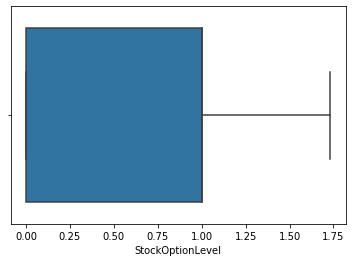

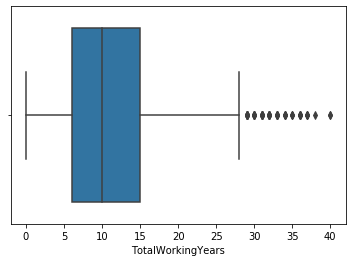

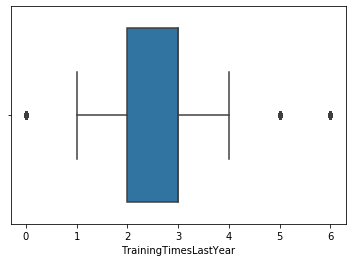

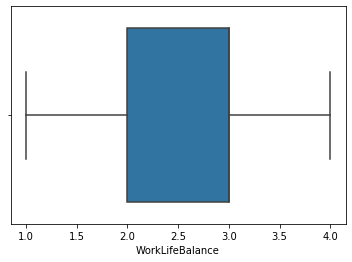

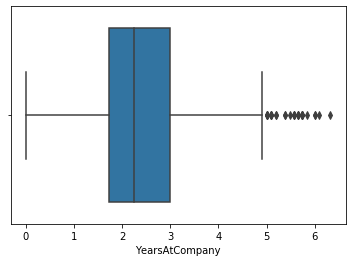

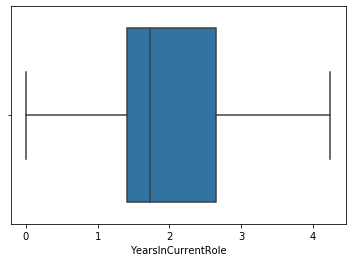

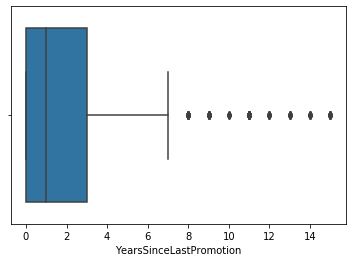

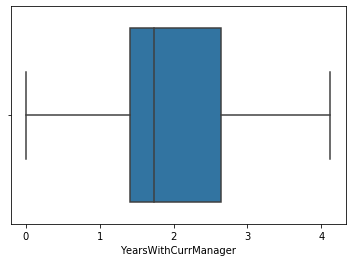

In [82]:
for i in num_feat:
    plt.figure()
    sns.boxplot(x=df[i])

There are some outliers in TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion. These outliers can be removed.

In [83]:
df1 = df
for i in num_feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]
df1.shape

(933, 33)

In [84]:
# creating a copy of dataframe
df1 = df
outliers = ['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion']
for i in outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    a = df.shape[0]
    b = df1.shape[0]
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df1[i] >= Q1 - 1.5 * IQR) & (df1[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]
    c = df1.shape[0]
    print (round((b-c)*100/a,1),"% rows have been removed from the data frame due to outliers in", i)

4.3 % rows have been removed from the data frame due to outliers in TotalWorkingYears
15.4 % rows have been removed from the data frame due to outliers in TrainingTimesLastYear
0.4 % rows have been removed from the data frame due to outliers in YearsAtCompany
5.1 % rows have been removed from the data frame due to outliers in YearsSinceLastPromotion


Since we are losing 15% of data when removing the outliers from TrainingTimesLastYear. So it is not good to remove the outliers from that column.

In [85]:
# removing the outliers from the original dataset
outliers = ['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']
for i in num_feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]
df1.shape

(1099, 33)

In [86]:
# categorical features
columns = list(df.columns)
cat_feat = [feat for feat in columns if feat not in num_feat]

In [87]:
for i in cat_feat:
    print(i,"\n",df[i].unique())

Attrition 
 ['Yes' 'No']
BusinessTravel 
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department 
 ['Research & Development' 'Sales' 'Human Resources']
EducationField 
 ['Other' 'Life Sciences' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender 
 ['Male' 'Female']
JobRole 
 ['Laboratory Technician' 'Research Scientist' 'Research Director'
 'Manager' 'Sales Executive' 'Healthcare Representative'
 'Sales Representative' 'Manufacturing Director' 'Human Resources']
MaritalStatus 
 ['Single' 'Married' 'Divorced']
Over18 
 ['Y']
OverTime 
 ['Yes' 'No']


Since over18 has only one value. This column has no effect on the training of the model. We can drop that column from the dataframe.

In [88]:
df = df.drop(["Over18"], axis = 1)

### splitting up target and features

In [89]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
X = df.drop(["Attrition"], axis = 1)
y = df["Attrition"]

In [57]:
cat_feat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [94]:
# categorical features
columns = list(df.columns)
cat_feat = [feat for feat in columns if feat not in num_feat]
import category_encoders as ce
encoder = ce.HelmertEncoder(cols =cat_feat, drop_invariant=True )
dfh = encoder.fit_transform(df[cat_feat])
df = pd.concat([X, dfh], axis = 1)

In [95]:
df_final = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime'], axis = 1)

The data has been cleaned and read to feed to the model.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.20)

### Logistic regression

In [97]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\Surjeet\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.8573508005822417
0.8953488372093024


Since the test accuracy is more than the train acciracy. Therefore, there is no overfitting of the model.

### Decision tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

1.0
1.0


The decision tree algorithm is giving very good accuracy for the prediction.

### Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
print(RF.score(X_train, y_train))
print(RF.score(X_test, y_test))

1.0
1.0


Again, we are getting very good accuracy for the model as we are getting in decision tree.

### Stochastic Gradient decent

In [108]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [109]:
print(SGD.score(X_train, y_train))
print(SGD.score(X_test, y_test))

0.834061135371179
0.8313953488372093


The accuracy of SGD is lesser than the decision tree and random forest.

## Conclusion

The best model comes out to be the decision tree. We can prefer the decision tree over the random forest becuase both the models has same accuracy but decision tree is simple and will work faster.

### Saving the best model as pkl file

In [114]:
import pickle
pickle.dump(DT, open("DT_model.pkl", 'wb'))

In [115]:
# how to load the saved model and use for predictions?
Saved_DT = pickle.load(open("DT_model.pkl", 'rb'))
score = Saved_DT.score(X_test, y_test)
score

1.0